# Starter point for the Machine Learning element of the coursework

This part of the coursework uses the same dataset as used in the first part of the coursework. In this part of the coursework you are going to develop four machine learning models for predicting the 'median_house_value' from the dataset. The focus here is on comparing the different models and looking at how you can improve them. There is no need to use a cleaned up version of the data from the first part of the coursework. But you can if you wish.

# Read in the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [ ]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

# Perform any data preparation on the dataset

In [ ]:
rooms_per_house = houses.total_rooms / houses.households
bed_per_room = houses.total_bedrooms / houses.total_rooms
pop_per_bed = houses.population / houses.total_bedrooms

houses["pop_per_houses"] = rooms_per_house
houses["bed_per_houses"] = bed_per_room
houses["pop_per_bed"] = pop_per_bed


# Split the data into samples and labels

In [ ]:
## x = features 
## y = labels

y = houses.median_house_value
x = houses.drop('median_house_value', axis=1)
x.head()

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,pop_per_houses,bed_per_houses,pop_per_bed
0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,6.984127,0.146591,2.496124
1,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,6.238137,0.155797,2.170886
2,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,8.288136,0.129516,2.610526
3,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,5.817352,0.184458,2.374468
4,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,6.281853,0.172096,2.017857


# Split the data into training and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Introduction
I have created four regression models below designed to try and find the best way to predict the median house value based on the rest of the data. Firstly, I used basic linear regression on the entire dataset. 

# First model

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

# Test the first model

Root Mean squared error: 68009.47
R^2 value:  0.6564562413013294
['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude', 'pop_per_houses', 'bed_per_houses', 'pop_per_bed']
[ 4.23886897e+04  1.14729771e+03  2.19581162e+00  1.51780387e+01
 -4.16920084e+01  1.06513363e+02 -4.07109473e+04 -4.11633467e+04
  2.91924506e+03  3.09643044e+05  2.12599369e+01]


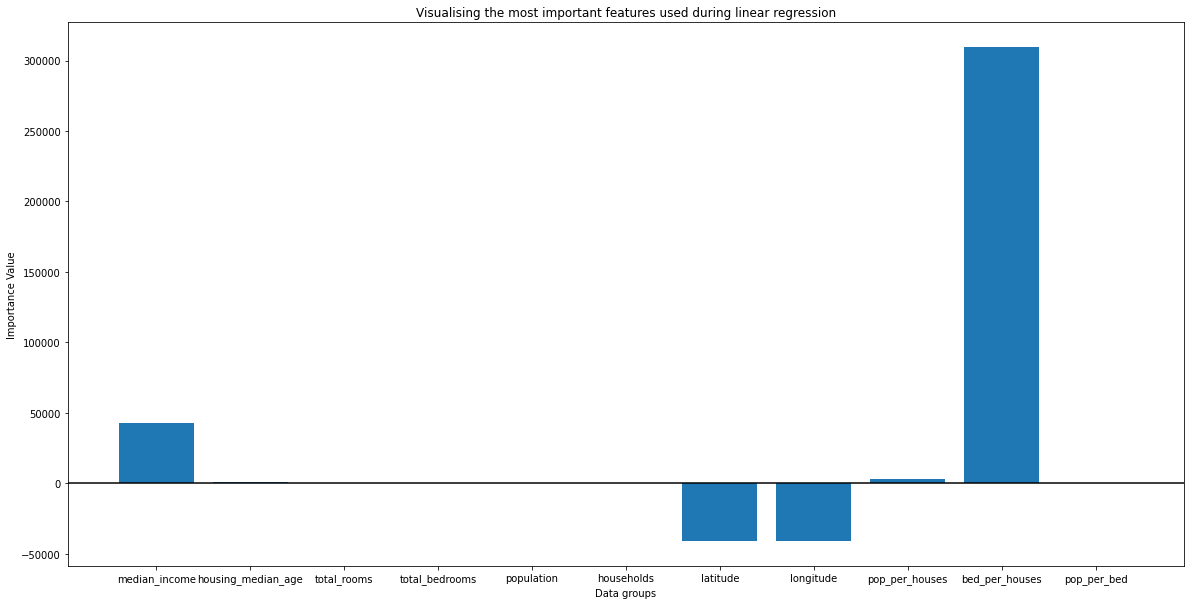

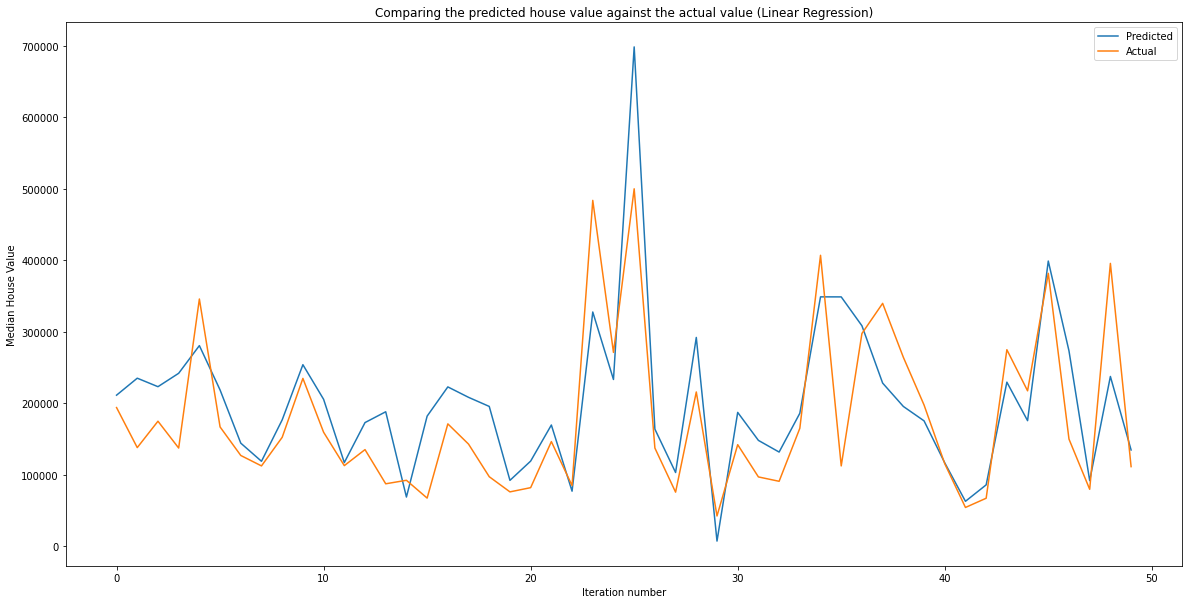

In [ ]:
##all features
#no finer tuning, just initial data

lr_pred = lr.predict(x_test)

lr_inital_r2 = lr.score(x_test, y_test)
MSE = mean_squared_error(y_test, lr_pred)
lr_inital_RMSE = np.sqrt(MSE)

print("Root Mean squared error: %.2f" % lr_inital_RMSE)
print("R^2 value: " , lr_inital_r2)


importance = lr.coef_

print(list(x_train))
print(importance)
plt.figure(figsize=(20,10))
plt.axhline(y=0, xmin=0, xmax=1, color='black')
plt.bar(list(x_train), importance)
plt.xlabel("Data groups")
plt.ylabel("Importance Value")
plt.title("Visualising the most important features used during linear regression")
plt.show()


results = pd.DataFrame({'Predicted' : lr_pred, 'Actual': y_test})
results = results.reset_index()
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (Linear Regression)")
plt.show()

# Any other metrics or hyperparameters that can be looked at?

As linear regression does not have any hyperparameters, I will rerun the test but this time focused only on the values identified as being the most important.

Root Mean squared error: 109076.66
R^2 value:  0.05635782013774515


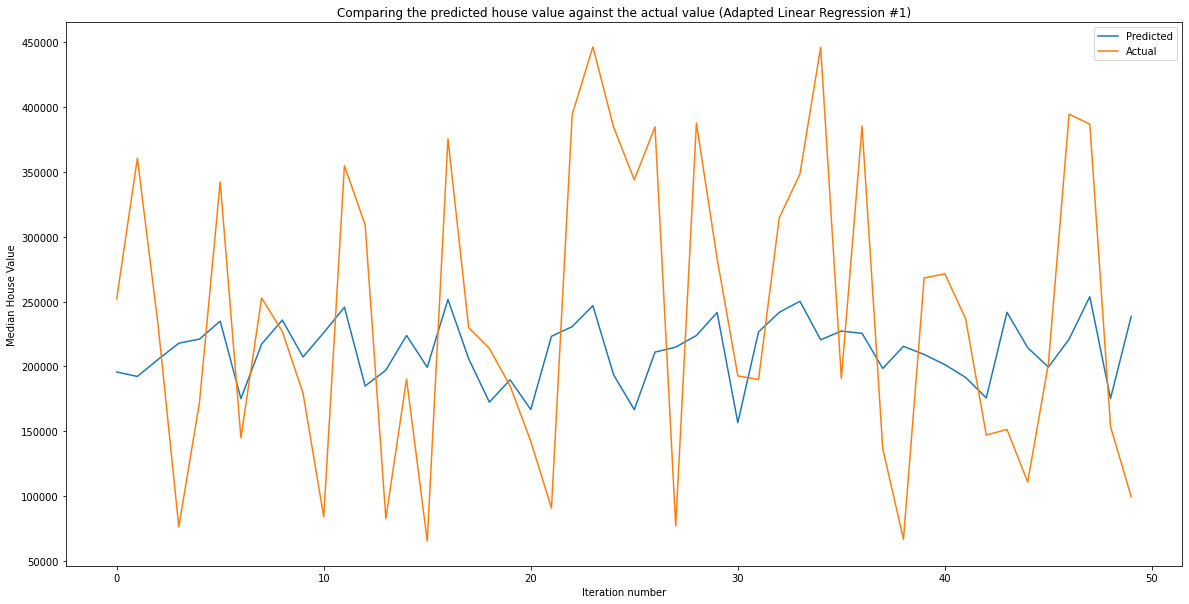

In [ ]:

# We can see that latitude and longitude negatively impact the regression
# Bed per houses is the largest postiive impact on the regression

y = houses.median_house_value
x_adapted = houses.bed_per_houses
x_adapted = x_adapted.values.reshape(-1, 1)
x_adapted_train_lr2, x_adapted_test_lr2, y_train_lr2, y_test_lr2 = train_test_split(x_adapted, y, test_size = 0.2)


lr2 = LinearRegression()
lr2.fit(x_adapted_train_lr2, y_train_lr2)

lr2_pred = lr2.predict(x_adapted_test_lr2)

adapted_lr_r2 = lr2.score(x_adapted_test_lr2, y_test_lr2)
MSE = mean_squared_error(y_test_lr2, lr2_pred)
adapted_lr_RMSE = np.sqrt(MSE)

print("Root Mean squared error: %.2f" % adapted_lr_RMSE)
print("R^2 value: " , adapted_lr_r2)


results = pd.DataFrame({'Predicted' : lr2_pred, 'Actual': y_test_lr2})
results = results.reset_index()
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (Adapted Linear Regression #1)")
plt.show()


This has caused a significantly worse performance due to the lack of the other features, so I shall try again but this time with everything but the features that negatively impacted the performance.

Root Mean squared error: 76121.13
R^2 value:  0.5545890343983167


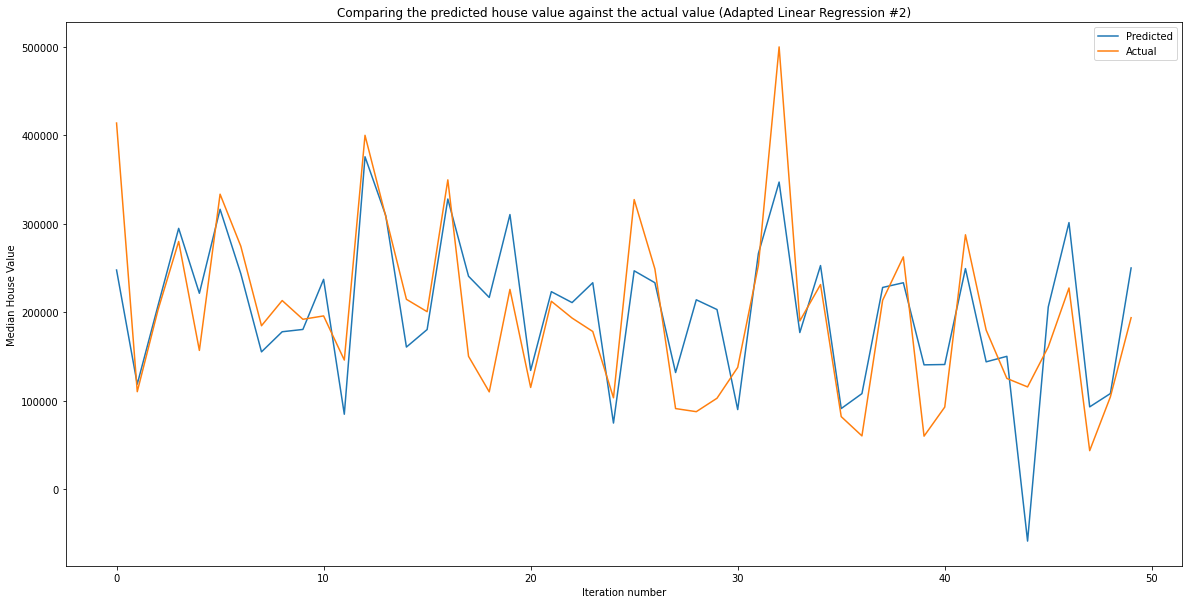

In [ ]:
y = houses.median_house_value
x_adapted = houses.drop(['median_house_value', 'longitude', 'latitude'], axis=1)
x_adapted_train_lr2, x_adapted_test_lr2, y_train_lr2, y_test_lr2 = train_test_split(x_adapted, y, test_size = 0.2)


lr2 = LinearRegression()
lr2.fit(x_adapted_train_lr2, y_train_lr2)

lr2_pred = lr2.predict(x_adapted_test_lr2)

adapted_lr_r2 = lr2.score(x_adapted_test_lr2, y_test_lr2)
MSE = mean_squared_error(y_test_lr2, lr2_pred)
adapted_lr_RMSE = np.sqrt(MSE)

print("Root Mean squared error: %.2f" % adapted_lr_RMSE)
print("R^2 value: " , adapted_lr_r2)


results = pd.DataFrame({'Predicted' : lr2_pred, 'Actual': y_test_lr2})
results = results.reset_index()
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (Adapted Linear Regression #2)")
plt.show()

This is an improvement on only using a single feature, however it is still a worse performance than training on every available feature. We can further check if it is beneficial to prioritise a few features of the dataset as opposed to all of them by using ElasticNet regularisation.

# Second model

In [ ]:
from sklearn.linear_model import ElasticNet

y = houses.median_house_value
x = houses.drop('median_house_value', axis=1)
x_train_elastic, x_test_elastic, y_train_elastic, y_test_elastic = train_test_split(x, y, test_size = 0.2)

elastic = ElasticNet()
elastic.fit(x_train_elastic, y_train_elastic)




ElasticNet()

# Test the second model

Root Mean squared error: 74376.46
R^2 value:  0.5902446259496099


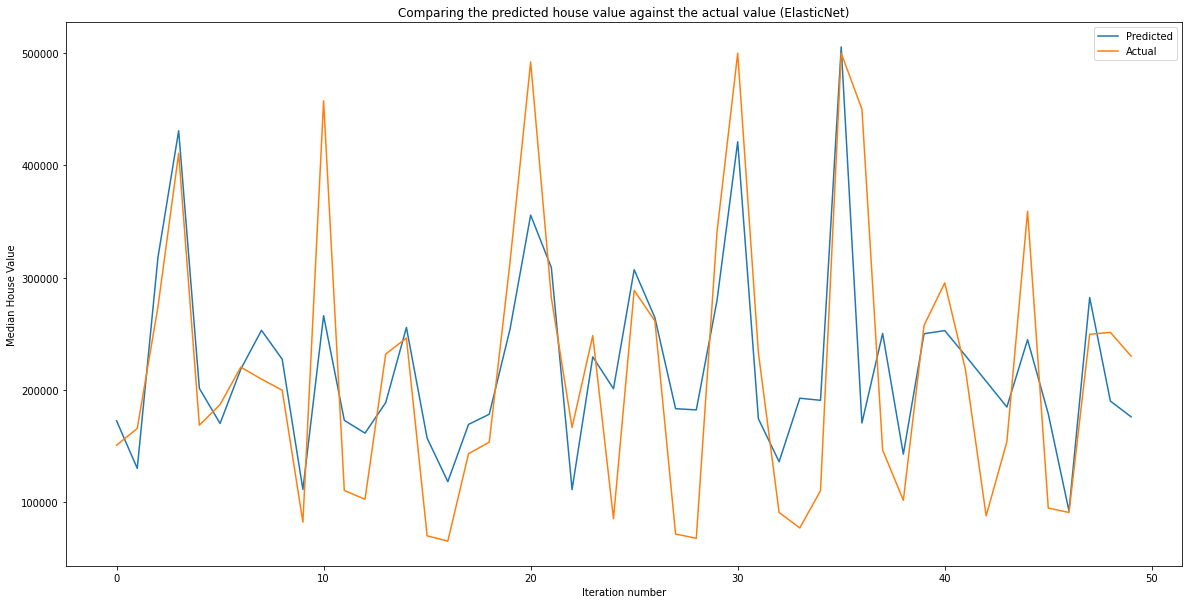

In [ ]:
elastic_pred = elastic.predict(x_test_elastic)


initial_elastic_r2 = elastic.score(x_test_elastic, y_test_elastic)
MSE = mean_squared_error(y_test_elastic, elastic_pred)
initial_elastic_RMSE = np.sqrt(MSE)

print("Root Mean squared error: %.2f" % initial_elastic_RMSE)
print("R^2 value: " , initial_elastic_r2)

results = pd.DataFrame({'Predicted' : elastic_pred, 'Actual': y_test_elastic})
results = results.reset_index() 
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (ElasticNet)")
plt.show()

This is a similar performance to the adapted linear regression model from before, which would suggest that all features are worth considering. However, I will try to improve the hyperparameters before completely removing the idea that all features need to be included.

# Any other metrics or hyperparameters that can be looked at?

Root Mean squared error: 74317.48
R^2 value:  0.5898398774588239


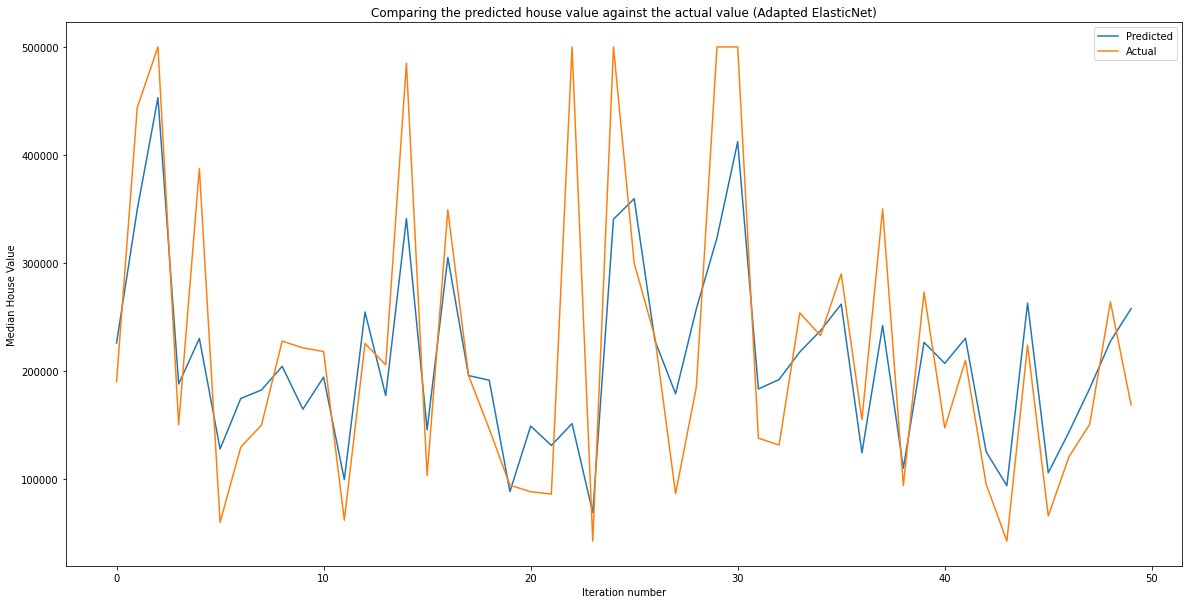

In [ ]:
y = houses.median_house_value
x = houses.drop('median_house_value', axis=1)
x_train_elastic2, x_test_elastic2, y_train_elastic2, y_test_elastic2 = train_test_split(x, y, test_size = 0.2)

elastic2 = ElasticNet(max_iter = 10000, warm_start = True, selection = 'random')
elastic2.fit(x_train_elastic2, y_train_elastic2)

elastic2_pred = elastic2.predict(x_test_elastic2)


adapted_elastic_r2 = elastic2.score(x_test_elastic2, y_test_elastic2)
MSE = mean_squared_error(y_test_elastic2, elastic2_pred)
adapted_elastic_RMSE = np.sqrt(MSE)

print("Root Mean squared error: %.2f" % adapted_elastic_RMSE)
print("R^2 value: " , adapted_elastic_r2)


results = pd.DataFrame({'Predicted' : elastic2_pred, 'Actual': y_test_elastic2})
results = results.reset_index()
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (Adapted ElasticNet)")
plt.show()

Despite changing three hyperparameters, the result is not too dissimilar to what was generated before. Changing the selection parameter to random means that it no longer cycles through each feature iiteratively and instead goes to another one randomly. The maximum number of iterations had to be increased to deal with this, but this does not cause any major changes to the result. I set warm start to true so it could keep any memory that would help it improve, but again, this was not as significant as hoped. 

Therefore, I shall use regression models that focus on utilising all of the available features in order to calculate a median house value.

# Third model




In [ ]:
##SUPPORT VECTOR REGRESSOR
from sklearn.svm import SVR


y = houses.median_house_value
x = houses.drop('median_house_value', axis=1)
x_train_svr, x_test_svr, y_train_svr, y_test_svr = train_test_split(x, y, test_size = 0.2)
svr = SVR(kernel='linear')
svr.fit(x_train_svr, y_train_svr)



SVR(kernel='linear')

# Test the third model

Root Mean squared error: 91959.05
R^2 value:  0.36902023788576555


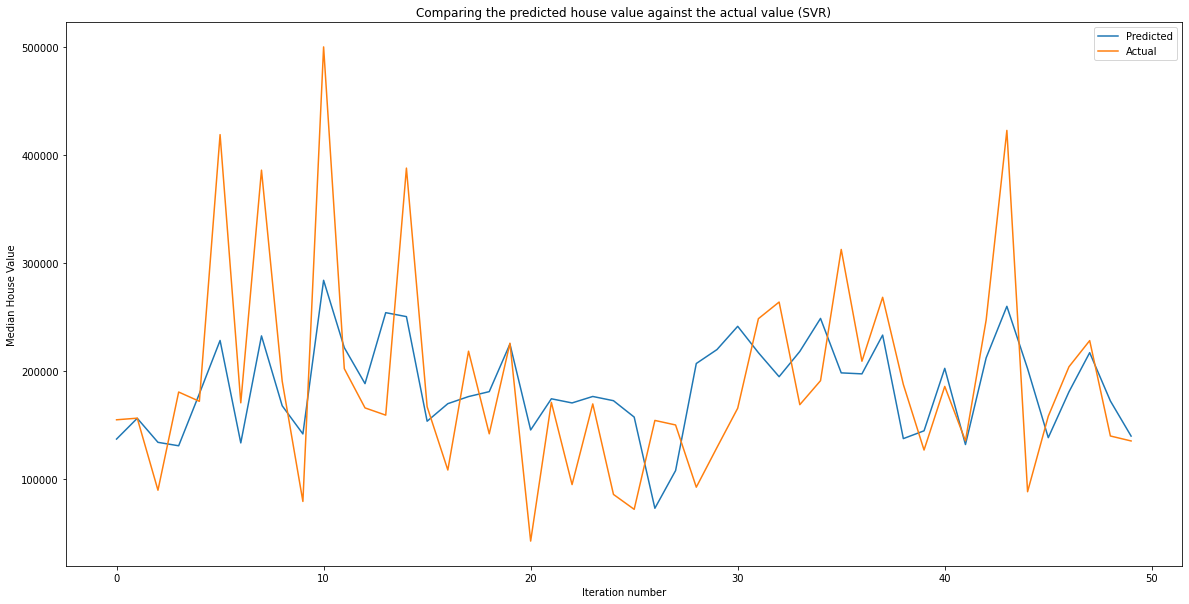

In [ ]:
svr_pred = svr.predict(x_test_svr)

MSE = mean_squared_error(y_test_svr, svr_pred)
initial_svr_RMSE = np.sqrt(MSE)
initial_svr_r2 = svr.score(x_test_svr, y_test_svr)

print("Root Mean squared error: %.2f" % initial_svr_RMSE)
print("R^2 value: " , initial_svr_r2)
results = pd.DataFrame({'Predicted' : svr_pred, 'Actual': y_test_svr})
results = results.reset_index()
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (SVR)")
plt.show()


This has produced a very low R^2 value despite it considering all of the features. I changed the default kernel type to linear as the previous two models assumed that linear would fit the dataset the most, so perhaps using the default kernal of rfb would be more appropriate for this data.

# Any other metrics or hyperparameters that can be looked at?

Root Mean squared error: 118684.08
R^2 value:  -0.04886894664383723


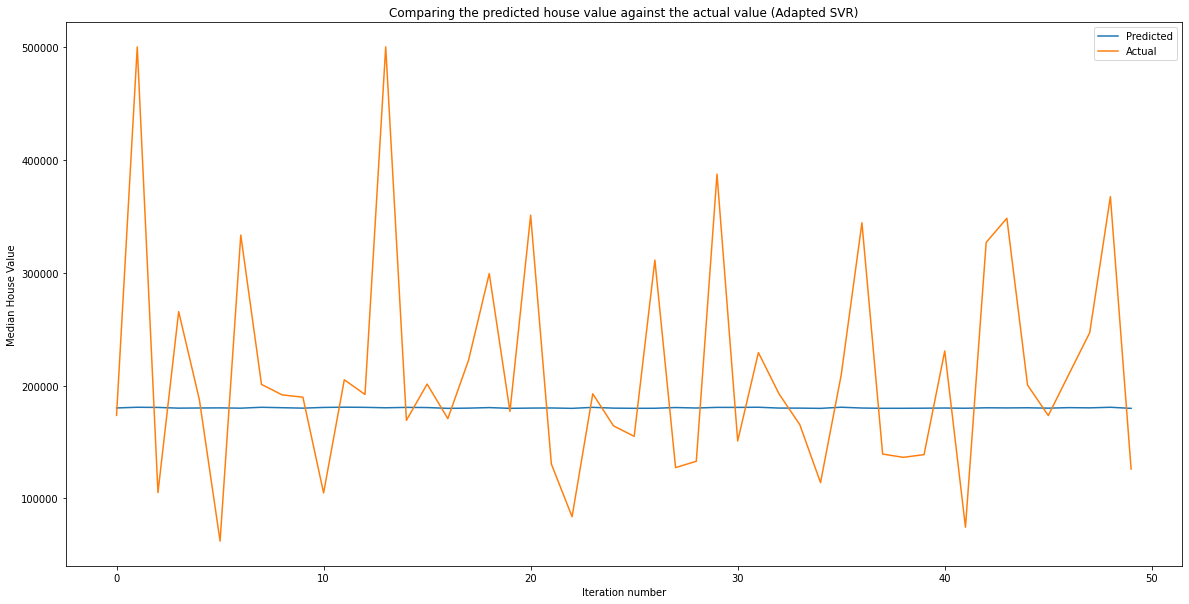

In [ ]:
y = houses.median_house_value
x = houses.drop('median_house_value', axis=1)
x_train_svr2, x_test_svr2, y_train_svr2, y_test_svr2 = train_test_split(x, y, test_size = 0.2)

svr2 = SVR(kernel='rbf', C=1, gamma='scale')
svr2.fit(x_train_svr2, y_train_svr2)

svr2_pred = svr2.predict(x_test_svr2)

MSE = mean_squared_error(y_test_svr2, svr2_pred)
adapted_svr_RMSE = np.sqrt(MSE)
adapted_svr_r2 = svr2.score(x_test_svr2, y_test_svr2)

print("Root Mean squared error: %.2f" % adapted_svr_RMSE)
print("R^2 value: " , adapted_svr_r2)
results = pd.DataFrame({'Predicted' : svr2_pred, 'Actual': y_test_svr2})
results = results.reset_index()
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (Adapted SVR)")
plt.show()


This has produced horrific results. The predicted values have very little variance with each other and are no where near what the actual value is. Before moving onto a fourth model, I am going to change the model slightly to utilise the LinearSVR model which should hopefully be a slight improvement upon just setting the kernel to linear.

Root Mean squared error: 91159.94
R^2 value:  0.35341750255981585


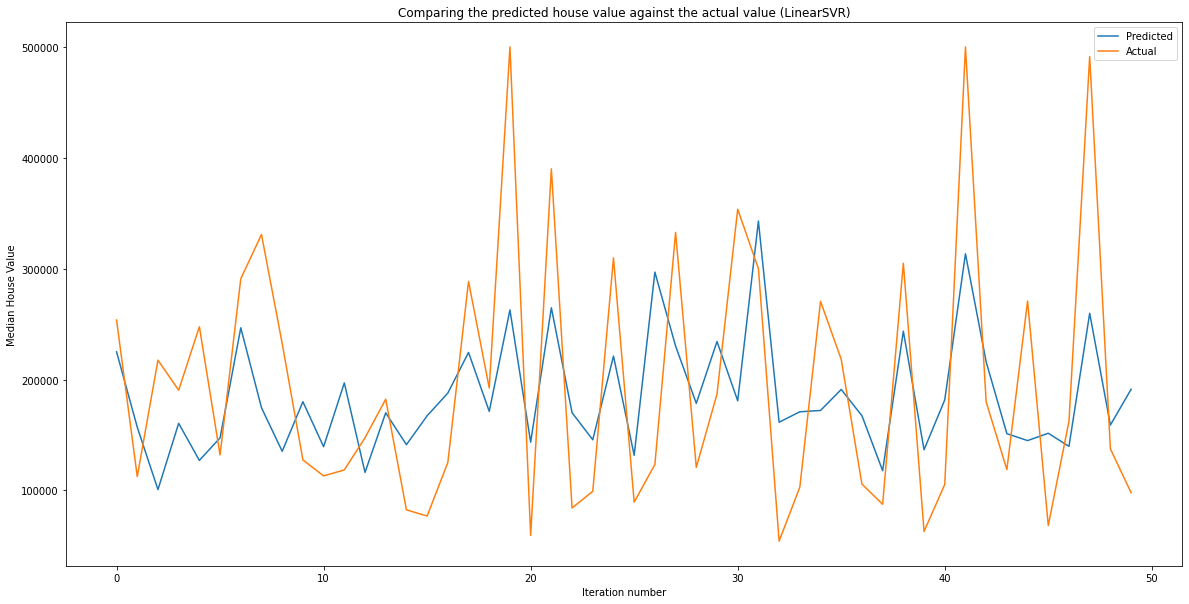

In [ ]:
#LINEAR SVR
from sklearn.svm import LinearSVR


y = houses.median_house_value
x = houses.drop('median_house_value', axis=1)
x_train_linearSVR, x_test_linearSVR, y_train_linearSVR, y_test_linearSVR = train_test_split(x, y, test_size = 0.2)
linearSVR = LinearSVR(max_iter=100000)
linearSVR.fit(x_train_linearSVR, y_train_linearSVR)

linearSVR_pred = linearSVR.predict(x_test_linearSVR)

MSE = mean_squared_error(y_test_linearSVR, linearSVR_pred)
adapted_svr_RMSE = np.sqrt(MSE)
adapted_svr_r2 = linearSVR.score(x_test_linearSVR, y_test_linearSVR)

print("Root Mean squared error: %.2f" % adapted_svr_RMSE)
print("R^2 value: " , adapted_svr_r2)
results = pd.DataFrame({'Predicted' : linearSVR_pred, 'Actual': y_test_linearSVR})
results = results.reset_index()
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (LinearSVR)")
plt.show()


This is only a marginal improvement on SVR with a linear kernel. The change should have allowed more flexibilty in the choice of penalties, however due to the fluxation when running the models, the difference can be considered negligible. Therefore, I am going to try a different ensemble regressor: random forest, due to its reliance on multiple features to introduce randomness into the training with ideal outcomes. 

# Fourth Model

In [ ]:
#RANDOM FOREST REGRSSOR
from sklearn.ensemble import RandomForestRegressor

y = houses.median_house_value
x = houses.drop('median_house_value', axis=1)
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x, y, test_size = 0.2)

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train_rf, y_train_rf)

RandomForestRegressor()

# Test the fourth model

Root Mean squared error: 51239.30
R^2 value:  0.8019000703280478
['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude', 'pop_per_houses', 'bed_per_houses', 'pop_per_bed']
[0.52739523 0.06096883 0.01355849 0.01166859 0.01392843 0.01398442
 0.08375501 0.08366348 0.03504458 0.03779475 0.11823818]


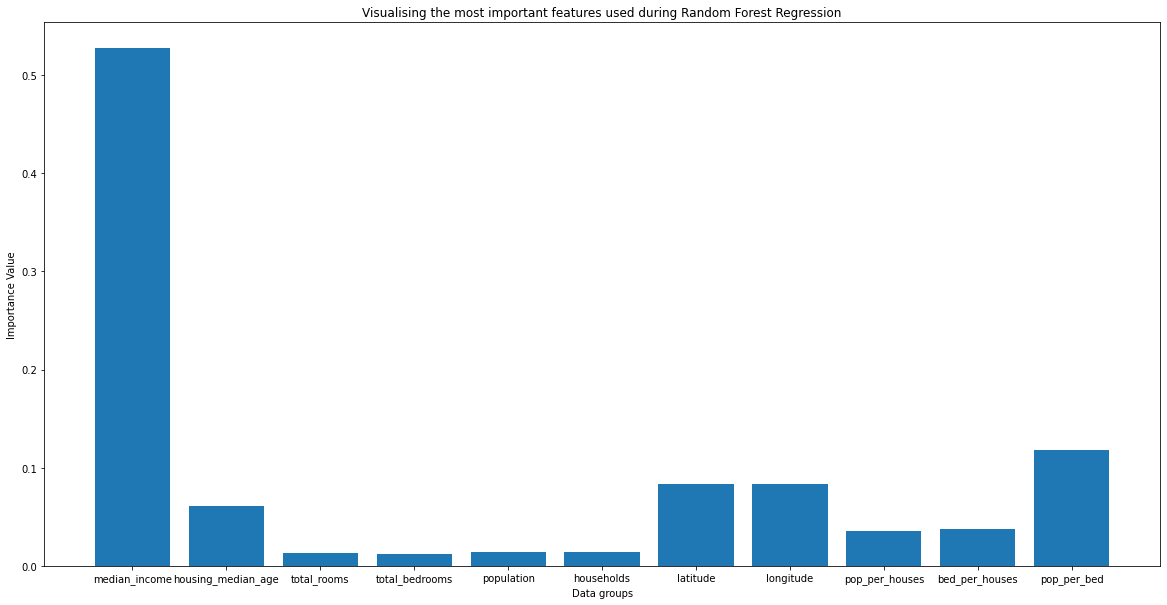

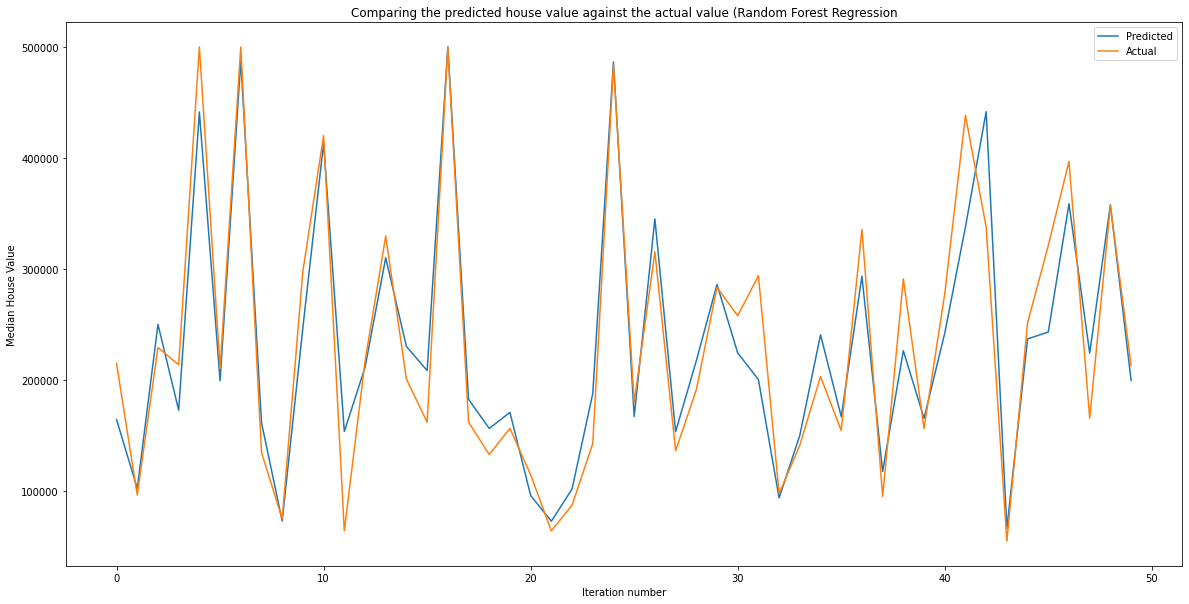

In [ ]:


rf_pred = rf.predict(x_test_rf)


MSE = mean_squared_error(y_test_rf, rf_pred)
initial_rf_RMSE = np.sqrt(MSE)
initial_rf_r2 = rf.score(x_test_rf, y_test_rf)

print("Root Mean squared error: %.2f" % initial_rf_RMSE)
print("R^2 value: " , initial_rf_r2)

importance = rf.feature_importances_
print(list(x_train_rf))
print(importance)
plt.figure(figsize=(20,10))
plt.xlabel("Data groups")
plt.ylabel("Importance Value")
plt.title("Visualising the most important features used during Random Forest Regression")
plt.bar(list(x_train_rf), importance)

results = pd.DataFrame({'Predicted' : rf_pred, 'Actual': y_test_rf})
results = results.reset_index()
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (Random Forest Regression)")
plt.show()


This is a drastically better fit for the data, giving me a R^2 value of roughly 0.8. Additionally, I checked the feature importance again to see how it differs from the original linear regression check and now we can see that it is actually median income with the highest importance on the value, with beds per houses now a more average looking feature. Despite this good performance, I will still try and refine the hyperparameters to create the best possible model.

# Any other metrics or hyperparameters that can be looked at?

Root Mean squared error: 49636.56
R^2 value:  0.8149513997384827


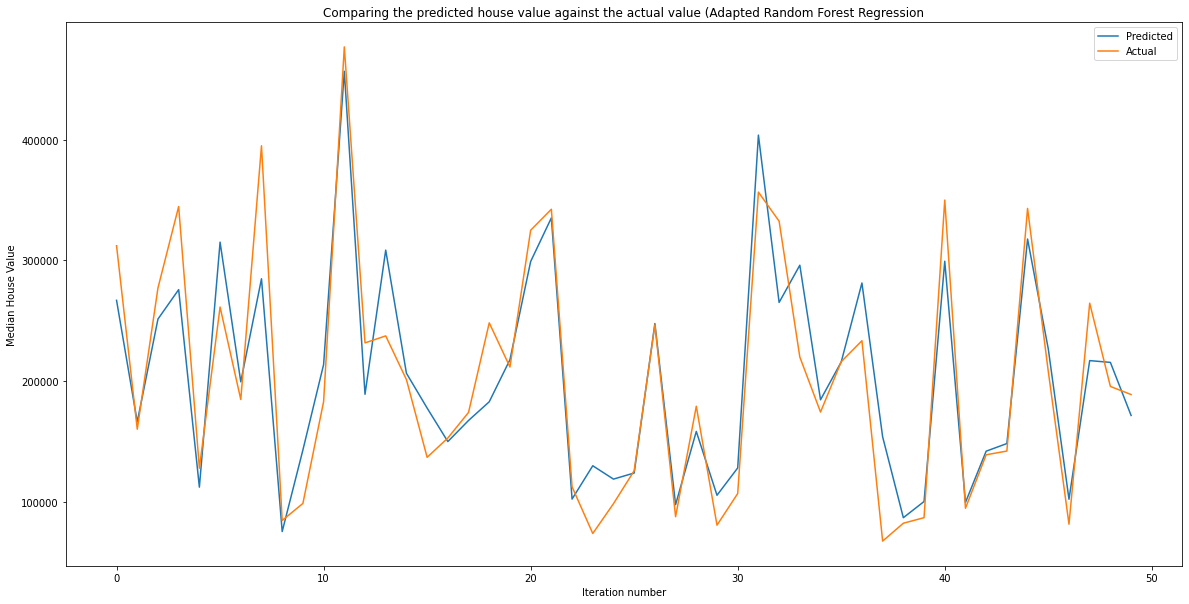

In [ ]:

y = houses.median_house_value
x = houses.drop('median_house_value', axis=1)
x_train_rf2, x_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(x, y, test_size = 0.2)

rf2 = RandomForestRegressor(n_estimators = 100, criterion='friedman_mse', random_state=42)
rf2.fit(x_train_rf2, y_train_rf2)

rf2_pred = rf2.predict(x_test_rf2)

MSE = mean_squared_error(y_test_rf2, rf2_pred)
adapted_rf_RMSE = np.sqrt(MSE)
adapted_rf_r2 = rf2.score(x_test_rf2, y_test_rf2)

print("Root Mean squared error: %.2f" % adapted_rf_RMSE)
print("R^2 value: " , adapted_rf_r2)

results = pd.DataFrame({'Predicted' : rf2_pred, 'Actual': y_test_rf2})
results = results.reset_index()
results = results.drop(['index'], axis=1)
plt.figure(figsize=(20,10))
plt.plot(results[:50])
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Iteration number")
plt.ylabel("Median House Value")
plt.title("Comparing the predicted house value against the actual value (Adapted Random Forest Regression)")
plt.show()


For this adaptation, I changed the criteria for measuring the quality of the split from squared error to Friedman's mean squared error as the RMSE is one of the metrics I have been measuring throughout this work, so it was worth seeing how that would effect the forest. Moreover, I changed the random state from the default (None) to 42. This changes how the numbers are randomly generated for the splitting of the trees, and I chose to use 42 as this is a popular choice in machine learning. 

Although, neither of these changes produced a significant difference from the original, default, random forest regressor. However, an improved R^2 score of 0.1-0.3 can still be considered a good improvement as it allows the prediction to fit the data better.

# Results

In [ ]:
metrics = [
    ['Initial Linear Regression', lr_inital_r2, lr_inital_RMSE],
    ['Adapted Linear Regression', adapted_lr_r2, adapted_lr_RMSE],
    ['Initial ElasticNet Regression', initial_elastic_r2, initial_elastic_RMSE],
    ['Adapted ElasticNet Regression', adapted_elastic_r2, adapted_elastic_RMSE],
    ['Initial SVR', initial_svr_r2, initial_svr_RMSE],
    ['Adapted SVR', adapted_svr_r2, adapted_svr_RMSE],
    ['Initial RFR', initial_rf_r2, initial_rf_RMSE],
    ['Adapted RFR', adapted_rf_r2, adapted_rf_RMSE]
    ]

metric_results = pd.DataFrame(metrics, columns=['Regression Model', 'R^2 Value', 'RMSE Value'])

metric_results.head(10)

,Regression Model,R^2 Value,RMSE Value
0,Initial Linear Regression,0.656456,68009.466478
1,Adapted Linear Regression,0.554589,76121.127291
2,Initial ElasticNet Regression,0.590245,74376.460385
3,Adapted ElasticNet Regression,0.589840,74317.477567
4,Initial SVR,0.369020,91959.048400
5,Adapted SVR,0.353418,91159.936605
6,Initial RFR,0.801900,51239.303802
7,Adapted RFR,0.814951,49636.557292


Here I have gathered the metrics I took for all 8 different models. While the exact values will differ every time the program is run, they always stay consistent with each other. We can see that the adapted Random Forest Regressor had the best R^2 and consequently the lowest Root Mean Squared Error. Therefore, I will produce further analysis on this model before starting my concluding thoughts.

In [ ]:

pred_mean = rf2_pred.mean()
pred_std = rf2_pred.std()
train_mean = y_train_rf2.mean()
train_std = y_train_rf2.std()

print("The mean average prediction value for the adapted Randon Forest Regressor was: %.2f" % pred_mean, "(standard deviation: %.2f)."%pred_std)
print("The mean average training value for the adapted Randon Forest Regressor was: %.2f" % train_mean, "(standard deviation: %.2f)."%train_std)

mean_diff = pred_mean - train_mean

print("This results in a difference of %.2f" %mean_diff)

The mean average prediction value for the adapted Randon Forest Regressor was: 208727.15 (standard deviation: 101634.96).
The mean average training value for the adapted Randon Forest Regressor was: 206713.26 (standard deviation: 115397.21).
This results in a difference of 2013.89
